In [1]:
import json
from web3 import Web3
import pandas as pd
import numpy as np
import datetime
import time
import seaborn as sns
df = sns.load_dataset('iris')
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [2]:
#open burnrate data
df2 = pd.read_csv('yield-burnrate10.csv') 

In [3]:
#get Date
df2['Date'] = pd.to_datetime(df2['timestamp'], unit = 's')

In [4]:
df2

,Unnamed: 0,transactionIndex,burnRateWei,blockNumber,timestamp,Date
0,0,162.0,0.000000e+00,13178928,1631021709,2021-09-07 13:35:09
1,1,284.0,0.000000e+00,13178976,1631022342,2021-09-07 13:45:42
2,2,219.0,1.000000e+13,13179030,1631023074,2021-09-07 13:57:54
3,3,65.0,1.000000e+09,13179108,1631024236,2021-09-07 14:17:16
4,4,131.0,2.000000e+10,13179791,1631033015,2021-09-07 16:43:35
...,...,...,...,...,...,...
276,366,114.0,1.350000e+12,14085947,1643262765,2022-01-27 05:52:45
277,367,177.0,0.000000e+00,14091866,1643341668,2022-01-28 03:47:48
278,368,239.0,1.000000e+12,14147017,1644077693,2022-02-05 16:14:53
279,369,153.0,2.520000e+13,14201315,1644802795,2022-02-14 01:39:55


In [5]:
#convert burnRate

df2['burnrateSLP'] = df2['burnRateWei'].apply(lambda x: x *10**-13)#error with burnrate

In [6]:
df2.drop(['Unnamed: 0','burnRateWei','timestamp','blockNumber'], axis='columns', inplace=True)

In [7]:
#open slot_data
df1 = pd.read_csv('yield-slots_data10.csv') 

In [8]:
df1 = df1.drop(['Unnamed: 0','logIndex'], axis = 1)

In [9]:
df = pd.concat([df1, df2], axis='columns')

In [10]:
df

,transactionIndex,transactionHash,blockNumber,poolId,newOwner,previousOwner,slotId,gasUsed,gasPrice,ethSpent,depositSLP,rewardsFVTForSession,transactionIndex,Date,burnrateSLP
0,162.0,b'[\xe9\x99ta+\x06Wj\x9f\x16g\xf7\x14\xfaS\xe3...,13178928,1.0,0x2000e0171c5E7b79b2f29068122CAE26012B02df,0x0000000000000000000000000000000000000000,30.0,159731.0,7.610000e+10,0.012156,0.000000,0.000000,162.0,2021-09-07 13:35:09,0.0000
1,284.0,b'\xeac\xe1\xdb!\xa4%\xfd\xb0\xcb\xd4u\xda0_\x...,13178976,1.0,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,0x0000000000000000000000000000000000000000,13.0,142631.0,1.027863e+11,0.014661,0.000000,0.000000,284.0,2021-09-07 13:45:42,0.0000
2,219.0,"b'F7\r$C\x01\xbe\xc6\xc7\xa6\xfc,\xcd\x07&\xb1...",13179030,1.0,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,0x0000000000000000000000000000000000000000,1.0,263039.0,1.171141e+11,0.030806,400.000000,0.000000,219.0,2021-09-07 13:57:54,1.0000
3,65.0,b'v\x8at\xcc\xcc\xc2E=\xfd\xb2\xfa\xbd6T\xf0\x...,13179108,1.0,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,0x0000000000000000000000000000000000000000,11.0,228815.0,1.497132e+11,0.034257,70.000000,0.000000,65.0,2021-09-07 14:17:16,0.0001
4,131.0,b':\x032\xba\x02\xfa\xa4\xf9\x98\xeb\x17\x90\x...,13179791,1.0,0xd557D7443D50f2252f7074269303477C1DFD3451,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,11.0,302248.0,2.040657e+11,0.061678,100.000000,405.322492,131.0,2021-09-07 16:43:35,0.0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,114.0,"b'M}\xa5\x14\x04\xf7\x830D\x9a,\x0f\x06\x08\xd...",14085947,1.0,0x151D712669AdEBAA73624e6F735c157b6a0F5a5b,0x0788373603522a79fCC5710910C20067f64BAD17,5.0,274650.0,7.313147e+10,0.020086,935.000000,163961.784294,114.0,2022-01-27 05:52:45,0.1350
277,177.0,b'K\xc1V\xbcAG\xda\x84\xa8\x90\xec\x12\xbf\xc5...,14091866,1.0,0x0000000000000000000000000000000000000000,0x151D712669AdEBAA73624e6F735c157b6a0F5a5b,5.0,240648.0,1.130997e+11,0.027217,0.000000,2877.351231,177.0,2022-01-28 03:47:48,0.0000
278,239.0,b'\xef\xc6c\x1f\x13iZ\x9d\x05#\xceX\xa6\xde\xc...,14147017,1.0,0xA25207Bb8f8EC2423E2ddf2686A0CD2048352f3E,0x0000000000000000000000000000000000000000,5.0,140534.0,5.300000e+10,0.007448,393.646740,0.000000,239.0,2022-02-05 16:14:53,0.1000
279,153.0,"b'\xcfe\x9d\xeb<!\x1bz\x95T\x05\xf3B\xf9P,1]\x...",14201315,1.0,0x99CCF0db7783927E9a1Ad324e99b6964C587024A,0x28de46689b899af843Ec549199AD70a75ad4d960,4.0,231860.0,4.378288e+10,0.010151,250.700000,174658.347714,153.0,2022-02-14 01:39:55,2.5200


In [11]:
# add eviction column
df['eviction'] = [1 if a != '0x0000000000000000000000000000000000000000' else 0 for a in df['newOwner']]

In [12]:
df.drop(['transactionIndex','transactionHash','poolId','gasUsed','ethSpent'], axis= 1, inplace=True)

In [13]:
df

,blockNumber,newOwner,previousOwner,slotId,gasPrice,depositSLP,rewardsFVTForSession,Date,burnrateSLP,eviction
0,13178928,0x2000e0171c5E7b79b2f29068122CAE26012B02df,0x0000000000000000000000000000000000000000,30.0,7.610000e+10,0.000000,0.000000,2021-09-07 13:35:09,0.0000,1
1,13178976,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,0x0000000000000000000000000000000000000000,13.0,1.027863e+11,0.000000,0.000000,2021-09-07 13:45:42,0.0000,1
2,13179030,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,0x0000000000000000000000000000000000000000,1.0,1.171141e+11,400.000000,0.000000,2021-09-07 13:57:54,1.0000,1
3,13179108,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,0x0000000000000000000000000000000000000000,11.0,1.497132e+11,70.000000,0.000000,2021-09-07 14:17:16,0.0001,1
4,13179791,0xd557D7443D50f2252f7074269303477C1DFD3451,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,11.0,2.040657e+11,100.000000,405.322492,2021-09-07 16:43:35,0.0020,1
...,...,...,...,...,...,...,...,...,...,...
276,14085947,0x151D712669AdEBAA73624e6F735c157b6a0F5a5b,0x0788373603522a79fCC5710910C20067f64BAD17,5.0,7.313147e+10,935.000000,163961.784294,2022-01-27 05:52:45,0.1350,1
277,14091866,0x0000000000000000000000000000000000000000,0x151D712669AdEBAA73624e6F735c157b6a0F5a5b,5.0,1.130997e+11,0.000000,2877.351231,2022-01-28 03:47:48,0.0000,0
278,14147017,0xA25207Bb8f8EC2423E2ddf2686A0CD2048352f3E,0x0000000000000000000000000000000000000000,5.0,5.300000e+10,393.646740,0.000000,2022-02-05 16:14:53,0.1000,1
279,14201315,0x99CCF0db7783927E9a1Ad324e99b6964C587024A,0x28de46689b899af843Ec549199AD70a75ad4d960,4.0,4.378288e+10,250.700000,174658.347714,2022-02-14 01:39:55,2.5200,1


In [14]:
#start block 13178901 and pulse length  100000
#last as to date 14091866
df['blockNumber'].max()

14248442

In [15]:
#pulses so far
(14091866- 13178901) / 100000

9.12965

In [16]:
# get pulse
conditions = [
    (df['blockNumber'] > 13178901 ) & (df['blockNumber'] <= 13178901 + 100000),
    (df['blockNumber'] > 13178901 + 100000) & (df['blockNumber'] <= 13178901 + 200000),
    (df['blockNumber'] > 13178901 + 200000) & (df['blockNumber'] <= 13178901 + 300000),
    (df['blockNumber'] > 13178901 + 300000) & (df['blockNumber'] <= 13178901 + 400000),
    (df['blockNumber'] > 13178901 + 400000) & (df['blockNumber'] <= 13178901 + 500000),
    (df['blockNumber'] > 13178901 + 500000) & (df['blockNumber'] <= 13178901 + 600000),
    (df['blockNumber'] > 13178901 + 600000) & (df['blockNumber'] <= 13178901 + 700000),
    (df['blockNumber'] > 13178901 + 700000) & (df['blockNumber'] <= 13178901 + 800000),
    (df['blockNumber'] > 13178901 + 800000) & (df['blockNumber'] <= 13178901 + 900000),
    (df['blockNumber'] > 13178901 + 900000) & (df['blockNumber'] <= 13178901 + 1000000),
    (df['blockNumber'] > 13178901 + 1000000) & (df['blockNumber'] <= 13178901 + 1100000),
    ]

values = ['1','2','3','4','5','6','7','8','9','10','11']

df['pulse'] = np.select(conditions, values)

In [17]:
df.dtypes

blockNumber                      int64
newOwner                        object
previousOwner                   object
slotId                         float64
gasPrice                       float64
depositSLP                     float64
rewardsFVTForSession           float64
Date                    datetime64[ns]
burnrateSLP                    float64
eviction                         int64
pulse                           object
dtype: object

In [18]:
conditions = [
    (df['blockNumber'] > 13178901) & (df['blockNumber'] <= 13178901 + (100000*0.25)),
    (df['blockNumber'] > 13178901 +100000) & (df['blockNumber'] <= 13178901 + (100000*1.25)),
    (df['blockNumber'] > 13178901 +200000) & (df['blockNumber'] <= 13178901 + (100000*2.25)),
    (df['blockNumber'] > 13178901 +300000) & (df['blockNumber'] <= 13178901 + (100000*3.25)),
    (df['blockNumber'] > 13178901 +400000) & (df['blockNumber'] <= 13178901 + (100000*4.25)),
    (df['blockNumber'] > 13178901 +500000) & (df['blockNumber'] <= 13178901 + (100000*5.25)),
    (df['blockNumber'] > 13178901 +600000) & (df['blockNumber'] <= 13178901 + (100000*6.25)),
    (df['blockNumber'] > 13178901 +700000) & (df['blockNumber'] <= 13178901 + (100000*7.25)),
    (df['blockNumber'] > 13178901 +800000) & (df['blockNumber'] <= 13178901 + (100000*8.25)),
    (df['blockNumber'] > 13178901 +900000) & (df['blockNumber'] <= 13178901 + (1000000*9.25)),
    (df['blockNumber'] > 13178901 +1000000) & (df['blockNumber'] <= 13178901 + (100000*10.25)),
    
    (df['blockNumber'] > 13178901 + (100000*0.25)) & (df['blockNumber'] <= 13178901 + (100000*0.5)),
    (df['blockNumber'] > 13178901 + (100000*1.25)) & (df['blockNumber'] <= 13178901 + (100000*1.5)),
    (df['blockNumber'] > 13178901 + (100000*2.25)) & (df['blockNumber'] <= 13178901 + (100000*2.5)),
    (df['blockNumber'] > 13178901 + (100000*3.25)) & (df['blockNumber'] <= 13178901 + (100000*3.5)),
    (df['blockNumber'] > 13178901 + (100000*4.25)) & (df['blockNumber'] <= 13178901 + (100000*4.5)),
    (df['blockNumber'] > 13178901 + (100000*5.25)) & (df['blockNumber'] <= 13178901 + (100000*5.5)),
    (df['blockNumber'] > 13178901 + (100000*6.25)) & (df['blockNumber'] <= 13178901 + (100000*6.5)),
    (df['blockNumber'] > 13178901 + (100000*7.25)) & (df['blockNumber'] <= 13178901 + (100000*7.5)),
    (df['blockNumber'] > 13178901 + (100000*8.25)) & (df['blockNumber'] <= 13178901 + (100000*8.5)),
    (df['blockNumber'] > 13178901 + (100000*9.25)) & (df['blockNumber'] <= 13178901 + (100000*9.5)),
    (df['blockNumber'] > 13178901 + (100000*10.25)) & (df['blockNumber'] <= 13178901 + (100000*10.5)),
    
    (df['blockNumber'] > 13178901 + (100000*0.5)) & (df['blockNumber'] <= 13178901 + (100000*0.75)),
    (df['blockNumber'] > 13178901 + (100000*1.5)) & (df['blockNumber'] <= 13178901 + (100000*1.75)),
    (df['blockNumber'] > 13178901 + (100000*2.5)) & (df['blockNumber'] <= 13178901 + (100000*2.75)),
    (df['blockNumber'] > 13178901 + (100000*3.5)) & (df['blockNumber'] <= 13178901 + (100000*3.75)),
    (df['blockNumber'] > 13178901 + (100000*4.5)) & (df['blockNumber'] <= 13178901 + (100000*4.75)),
    (df['blockNumber'] > 13178901 + (100000*5.5)) & (df['blockNumber'] <= 13178901 + (100000*5.75)),
    (df['blockNumber'] > 13178901 + (100000*6.5)) & (df['blockNumber'] <= 13178901 + (100000*6.75)),
    (df['blockNumber'] > 13178901 + (100000*7.5)) & (df['blockNumber'] <= 13178901 + (100000*7.75)),
    (df['blockNumber'] > 13178901 + (100000*8.5)) & (df['blockNumber'] <= 13178901 + (100000*8.75)),
    (df['blockNumber'] > 13178901 + (100000*9.5)) & (df['blockNumber'] <= 13178901 + (100000*9.75)),
    (df['blockNumber'] > 13178901 + (100000*10.5)) & (df['blockNumber'] <= 13178901 + (100000*10.75)), 
    
    (df['blockNumber'] > 13178901 + (100000*0.75)) & (df['blockNumber'] <= 13178901 + (100000*1)),
    (df['blockNumber'] > 13178901 + (100000*1.75)) & (df['blockNumber'] <= 13178901 + (100000*2)),
    (df['blockNumber'] > 13178901 + (100000*2.75)) & (df['blockNumber'] <= 13178901 + (100000*3)),
    (df['blockNumber'] > 13178901 + (100000*3.75)) & (df['blockNumber'] <= 13178901 + (100000*4)),
    (df['blockNumber'] > 13178901 + (100000*4.75)) & (df['blockNumber'] <= 13178901 + (100000*5)),
    (df['blockNumber'] > 13178901 + (100000*5.75)) & (df['blockNumber'] <= 13178901 + (100000*6)),
    (df['blockNumber'] > 13178901 + (100000*6.75)) & (df['blockNumber'] <= 13178901 + (100000*7)),
    (df['blockNumber'] > 13178901 + (100000*7.75)) & (df['blockNumber'] <= 13178901 + (100000*8)),
    (df['blockNumber'] > 13178901 + (100000*8.75)) & (df['blockNumber'] <= 13178901 + (100000*9)),
    (df['blockNumber'] > 13178901 + (100000*9.75)) & (df['blockNumber'] <= 13178901 + (100000*10)),
    (df['blockNumber'] > 13178901 + (100000*10.75)) & (df['blockNumber'] <= 13178901 + (100000*11)),
    ]

values = ['1','1','1','1','1','1','1','1','1','1','1','2','2','2','2','2','2','2','2','2','2','2','3','3','3','3','3','3','3','3','3','3','3','4','4','4','4','4','4','4','4','4','4','4']
df['pulse_quarter'] = np.select(conditions, values)      

In [19]:
#df = df.reindex(columns = ['blockNumber','timestamp','Date','poolId','slotId','newOwner','previousOwner','depositSLP','burnrateSLP','rewardsFVTForSession','eviction','pulse','pulse_quarter','ethSpent','gasUsed','gasPrice','transactionHash','transactionIndex'])

In [20]:
df

,blockNumber,newOwner,previousOwner,slotId,gasPrice,depositSLP,rewardsFVTForSession,Date,burnrateSLP,eviction,pulse,pulse_quarter
0,13178928,0x2000e0171c5E7b79b2f29068122CAE26012B02df,0x0000000000000000000000000000000000000000,30.0,7.610000e+10,0.000000,0.000000,2021-09-07 13:35:09,0.0000,1,1,1
1,13178976,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,0x0000000000000000000000000000000000000000,13.0,1.027863e+11,0.000000,0.000000,2021-09-07 13:45:42,0.0000,1,1,1
2,13179030,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,0x0000000000000000000000000000000000000000,1.0,1.171141e+11,400.000000,0.000000,2021-09-07 13:57:54,1.0000,1,1,1
3,13179108,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,0x0000000000000000000000000000000000000000,11.0,1.497132e+11,70.000000,0.000000,2021-09-07 14:17:16,0.0001,1,1,1
4,13179791,0xd557D7443D50f2252f7074269303477C1DFD3451,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,11.0,2.040657e+11,100.000000,405.322492,2021-09-07 16:43:35,0.0020,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
276,14085947,0x151D712669AdEBAA73624e6F735c157b6a0F5a5b,0x0788373603522a79fCC5710910C20067f64BAD17,5.0,7.313147e+10,935.000000,163961.784294,2022-01-27 05:52:45,0.1350,1,10,1
277,14091866,0x0000000000000000000000000000000000000000,0x151D712669AdEBAA73624e6F735c157b6a0F5a5b,5.0,1.130997e+11,0.000000,2877.351231,2022-01-28 03:47:48,0.0000,0,10,1
278,14147017,0xA25207Bb8f8EC2423E2ddf2686A0CD2048352f3E,0x0000000000000000000000000000000000000000,5.0,5.300000e+10,393.646740,0.000000,2022-02-05 16:14:53,0.1000,1,10,1
279,14201315,0x99CCF0db7783927E9a1Ad324e99b6964C587024A,0x28de46689b899af843Ec549199AD70a75ad4d960,4.0,4.378288e+10,250.700000,174658.347714,2022-02-14 01:39:55,2.5200,1,11,1


In [21]:
df.sort_values(by=['slotId','blockNumber'], inplace=True)

In [22]:
df

,blockNumber,newOwner,previousOwner,slotId,gasPrice,depositSLP,rewardsFVTForSession,Date,burnrateSLP,eviction,pulse,pulse_quarter
2,13179030,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,0x0000000000000000000000000000000000000000,1.0,1.171141e+11,400.000000,0.000000,2021-09-07 13:57:54,1.0,1,1,1
153,13300536,0x1711bc52bf7e0494325799717fe640F1924617B7,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,1.0,5.446536e+10,424.942066,30298.210733,2021-09-26 09:13:15,1.1,1,2,1
266,13853137,0xfFaCEf4fA1f0841ea479B168e734C1D5aeb41766,0x1711bc52bf7e0494325799717fe640F1924617B7,1.0,3.926634e+10,450.000000,109284.533927,2021-12-22 05:33:42,1.8,1,7,3
22,13182033,0xD2eadB71FFA6B638c059051b1A3C2157c9cD7A5C,0x0000000000000000000000000000000000000000,2.0,8.100000e+10,101.000000,0.000000,2021-09-08 01:10:59,1.0,1,1,1
124,13281419,0x68aAA618D6B7F5C9363760AC473d91056Fc7aC01,0xD2eadB71FFA6B638c059051b1A3C2157c9cD7A5C,2.0,4.030624e+10,216.000000,19652.415857,2021-09-23 10:20:53,1.5,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
80,13249764,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,0x351Da3c9B54621f3905462E865FE3723DCBA8e81,50.0,3.992732e+10,35.000000,15674.260348,2021-09-18 12:53:31,1.0,1,1,3
91,13266712,0x4595bDBeCA72c4FeAECC41ccc2ECaEd34ed291c8,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,50.0,6.003685e+10,90.000000,458.527927,2021-09-21 03:32:25,3.0,1,1,4
104,13268573,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,0x4595bDBeCA72c4FeAECC41ccc2ECaEd34ed291c8,50.0,3.100000e+10,90.000000,14.186815,2021-09-21 10:25:17,5.0,1,1,4
180,13378220,0xfFaCEf4fA1f0841ea479B168e734C1D5aeb41766,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,50.0,6.221129e+10,118.820000,20022.330127,2021-10-08 12:30:24,6.0,1,2,4


In [23]:
#which refer to previous owner: rewards, eviction, 

In [24]:
df['rewardsFVTForSession']= df['rewardsFVTForSession'].shift(periods=-1, fill_value=0)

In [25]:
df

,blockNumber,newOwner,previousOwner,slotId,gasPrice,depositSLP,rewardsFVTForSession,Date,burnrateSLP,eviction,pulse,pulse_quarter
2,13179030,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,0x0000000000000000000000000000000000000000,1.0,1.171141e+11,400.000000,30298.210733,2021-09-07 13:57:54,1.0,1,1,1
153,13300536,0x1711bc52bf7e0494325799717fe640F1924617B7,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,1.0,5.446536e+10,424.942066,109284.533927,2021-09-26 09:13:15,1.1,1,2,1
266,13853137,0xfFaCEf4fA1f0841ea479B168e734C1D5aeb41766,0x1711bc52bf7e0494325799717fe640F1924617B7,1.0,3.926634e+10,450.000000,0.000000,2021-12-22 05:33:42,1.8,1,7,3
22,13182033,0xD2eadB71FFA6B638c059051b1A3C2157c9cD7A5C,0x0000000000000000000000000000000000000000,2.0,8.100000e+10,101.000000,19652.415857,2021-09-08 01:10:59,1.0,1,1,1
124,13281419,0x68aAA618D6B7F5C9363760AC473d91056Fc7aC01,0xD2eadB71FFA6B638c059051b1A3C2157c9cD7A5C,2.0,4.030624e+10,216.000000,17776.208885,2021-09-23 10:20:53,1.5,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
80,13249764,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,0x351Da3c9B54621f3905462E865FE3723DCBA8e81,50.0,3.992732e+10,35.000000,458.527927,2021-09-18 12:53:31,1.0,1,1,3
91,13266712,0x4595bDBeCA72c4FeAECC41ccc2ECaEd34ed291c8,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,50.0,6.003685e+10,90.000000,14.186815,2021-09-21 03:32:25,3.0,1,1,4
104,13268573,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,0x4595bDBeCA72c4FeAECC41ccc2ECaEd34ed291c8,50.0,3.100000e+10,90.000000,20022.330127,2021-09-21 10:25:17,5.0,1,1,4
180,13378220,0xfFaCEf4fA1f0841ea479B168e734C1D5aeb41766,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,50.0,6.221129e+10,118.820000,22684.420446,2021-10-08 12:30:24,6.0,1,2,4


In [26]:
df['eviction']= df['eviction'].shift(periods=-1, fill_value=0)

In [27]:
df3 = df

In [28]:
df3['sessions'] = df3['rewardsFVTForSession'].apply(lambda x: x /20000)#error with burnrate

In [29]:
df3

,blockNumber,newOwner,previousOwner,slotId,gasPrice,depositSLP,rewardsFVTForSession,Date,burnrateSLP,eviction,pulse,pulse_quarter,sessions
2,13179030,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,0x0000000000000000000000000000000000000000,1.0,1.171141e+11,400.000000,30298.210733,2021-09-07 13:57:54,1.0,1,1,1,1.514911
153,13300536,0x1711bc52bf7e0494325799717fe640F1924617B7,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,1.0,5.446536e+10,424.942066,109284.533927,2021-09-26 09:13:15,1.1,1,2,1,5.464227
266,13853137,0xfFaCEf4fA1f0841ea479B168e734C1D5aeb41766,0x1711bc52bf7e0494325799717fe640F1924617B7,1.0,3.926634e+10,450.000000,0.000000,2021-12-22 05:33:42,1.8,1,7,3,0.000000
22,13182033,0xD2eadB71FFA6B638c059051b1A3C2157c9cD7A5C,0x0000000000000000000000000000000000000000,2.0,8.100000e+10,101.000000,19652.415857,2021-09-08 01:10:59,1.0,1,1,1,0.982621
124,13281419,0x68aAA618D6B7F5C9363760AC473d91056Fc7aC01,0xD2eadB71FFA6B638c059051b1A3C2157c9cD7A5C,2.0,4.030624e+10,216.000000,17776.208885,2021-09-23 10:20:53,1.5,0,2,1,0.888810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,13249764,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,0x351Da3c9B54621f3905462E865FE3723DCBA8e81,50.0,3.992732e+10,35.000000,458.527927,2021-09-18 12:53:31,1.0,1,1,3,0.022926
91,13266712,0x4595bDBeCA72c4FeAECC41ccc2ECaEd34ed291c8,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,50.0,6.003685e+10,90.000000,14.186815,2021-09-21 03:32:25,3.0,1,1,4,0.000709
104,13268573,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,0x4595bDBeCA72c4FeAECC41ccc2ECaEd34ed291c8,50.0,3.100000e+10,90.000000,20022.330127,2021-09-21 10:25:17,5.0,1,1,4,1.001117
180,13378220,0xfFaCEf4fA1f0841ea479B168e734C1D5aeb41766,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,50.0,6.221129e+10,118.820000,22684.420446,2021-10-08 12:30:24,6.0,1,2,4,1.134221


In [30]:
df3['Date'] = df3['Date'].dt.strftime('%-d-%-m-%Y')

In [31]:
df3['Date']

2        7-9-2021
153     26-9-2021
266    22-12-2021
22       8-9-2021
124     23-9-2021
          ...    
80      18-9-2021
91      21-9-2021
104     21-9-2021
180     8-10-2021
204    25-10-2021
Name: Date, Length: 281, dtype: object

In [32]:
#df3['Date'] = df3['Date'].dt.date

In [33]:
df3

,blockNumber,newOwner,previousOwner,slotId,gasPrice,depositSLP,rewardsFVTForSession,Date,burnrateSLP,eviction,pulse,pulse_quarter,sessions
2,13179030,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,0x0000000000000000000000000000000000000000,1.0,1.171141e+11,400.000000,30298.210733,7-9-2021,1.0,1,1,1,1.514911
153,13300536,0x1711bc52bf7e0494325799717fe640F1924617B7,0x85670c918fd6A80bdc92202C59D20b6E0c01C7E9,1.0,5.446536e+10,424.942066,109284.533927,26-9-2021,1.1,1,2,1,5.464227
266,13853137,0xfFaCEf4fA1f0841ea479B168e734C1D5aeb41766,0x1711bc52bf7e0494325799717fe640F1924617B7,1.0,3.926634e+10,450.000000,0.000000,22-12-2021,1.8,1,7,3,0.000000
22,13182033,0xD2eadB71FFA6B638c059051b1A3C2157c9cD7A5C,0x0000000000000000000000000000000000000000,2.0,8.100000e+10,101.000000,19652.415857,8-9-2021,1.0,1,1,1,0.982621
124,13281419,0x68aAA618D6B7F5C9363760AC473d91056Fc7aC01,0xD2eadB71FFA6B638c059051b1A3C2157c9cD7A5C,2.0,4.030624e+10,216.000000,17776.208885,23-9-2021,1.5,0,2,1,0.888810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,13249764,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,0x351Da3c9B54621f3905462E865FE3723DCBA8e81,50.0,3.992732e+10,35.000000,458.527927,18-9-2021,1.0,1,1,3,0.022926
91,13266712,0x4595bDBeCA72c4FeAECC41ccc2ECaEd34ed291c8,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,50.0,6.003685e+10,90.000000,14.186815,21-9-2021,3.0,1,1,4,0.000709
104,13268573,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,0x4595bDBeCA72c4FeAECC41ccc2ECaEd34ed291c8,50.0,3.100000e+10,90.000000,20022.330127,21-9-2021,5.0,1,1,4,1.001117
180,13378220,0xfFaCEf4fA1f0841ea479B168e734C1D5aeb41766,0xfDC09C96E5B7EBe2F6C36E1bc0B6a6A8C6571C82,50.0,6.221129e+10,118.820000,22684.420446,8-10-2021,6.0,1,2,4,1.134221


In [34]:
cg.get_coin_history_by_id(id = 'ethereum', date = '7-9-2021', localization = False)['market_data']['current_price']['usd']

3943.256785301908

In [35]:
#df3['ethprice'] = [ x*1 for x in df3['Date']]

In [36]:
datelist = []
for i in range(len(df)):
    datelist.append((df.loc[i, "Date"]))

In [37]:
datelist

['7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '7-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '8-9-2021',
 '9-9-2021',
 '9-9-2021',
 '9-9-2021',
 '9-9-2021',
 '9-9-2021',
 '9-9-2021',
 '10-9-2021',
 '10-9-2021',
 '10-9-2021',
 '11-9-2021',
 '11-9-2021',
 '11-9-2021',
 '11-9-2021',
 '11-9-2021',
 '11-9-2021',
 '11-9-2021',
 '11-9-2021',
 '11-9-2021',
 '11-9-2021',
 '11-9-2021',
 '11-9-2021',
 '12-9-2021',
 '12-9-2021',
 '12-9-2021',
 '12-9-2021',
 '12-9-2021',
 '14-9-2021',
 '14

In [51]:
d = {}
for date in datelist:
    coin = 'ethereum'
    d[date] = cg.get_coin_history_by_id(coin, date)['market_data']['current_price']['usd']
    time.sleep(12)   
    pd.DataFrame(d,index=[0])

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [39]:
df3.drop(['newOwner','previousOwner','sessions','Date'], axis = 1, inplace = True)

In [40]:
df3

,blockNumber,slotId,gasPrice,depositSLP,rewardsFVTForSession,burnrateSLP,eviction,pulse,pulse_quarter
2,13179030,1.0,1.171141e+11,400.000000,30298.210733,1.0,1,1,1
153,13300536,1.0,5.446536e+10,424.942066,109284.533927,1.1,1,2,1
266,13853137,1.0,3.926634e+10,450.000000,0.000000,1.8,1,7,3
22,13182033,2.0,8.100000e+10,101.000000,19652.415857,1.0,1,1,1
124,13281419,2.0,4.030624e+10,216.000000,17776.208885,1.5,0,2,1
...,...,...,...,...,...,...,...,...,...
80,13249764,50.0,3.992732e+10,35.000000,458.527927,1.0,1,1,3
91,13266712,50.0,6.003685e+10,90.000000,14.186815,3.0,1,1,4
104,13268573,50.0,3.100000e+10,90.000000,20022.330127,5.0,1,1,4
180,13378220,50.0,6.221129e+10,118.820000,22684.420446,6.0,1,2,4


In [44]:
df3.columns = ['Date','Slot','GasPrice','DepositAmount','Rewards_p_Session','BurnRate','Eviction','Pulse','Quarter_Pulse']

In [45]:
df3

,Date,Slot,GasPrice,DepositAmount,Rewards_p_Session,BurnRate,Eviction,Pulse,Quarter_Pulse
2,13179030,1.0,1.171141e+11,400.000000,30298.210733,1.0,1,1,1
153,13300536,1.0,5.446536e+10,424.942066,109284.533927,1.1,1,2,1
266,13853137,1.0,3.926634e+10,450.000000,0.000000,1.8,1,7,3
22,13182033,2.0,8.100000e+10,101.000000,19652.415857,1.0,1,1,1
124,13281419,2.0,4.030624e+10,216.000000,17776.208885,1.5,0,2,1
...,...,...,...,...,...,...,...,...,...
80,13249764,50.0,3.992732e+10,35.000000,458.527927,1.0,1,1,3
91,13266712,50.0,6.003685e+10,90.000000,14.186815,3.0,1,1,4
104,13268573,50.0,3.100000e+10,90.000000,20022.330127,5.0,1,1,4
180,13378220,50.0,6.221129e+10,118.820000,22684.420446,6.0,1,2,4


In [46]:
corrMatrix = df3.corr()
corrMatrix

,Date,Slot,GasPrice,DepositAmount,Rewards_p_Session,BurnRate,Eviction
Date,1.000000,-0.122699,0.061901,0.243858,-0.158839,0.342854,0.021438
Slot,-0.122699,1.000000,-0.078006,-0.037342,-0.115307,-0.074891,-0.026888
GasPrice,0.061901,-0.078006,1.000000,-0.157106,-0.167796,-0.086268,-0.256822
DepositAmount,0.243858,-0.037342,-0.157106,1.000000,0.188095,-0.091133,-0.079083
Rewards_p_Session,-0.158839,-0.115307,-0.167796,0.188095,1.000000,0.074947,-0.070622
BurnRate,0.342854,-0.074891,-0.086268,-0.091133,0.074947,1.000000,-0.035120
Eviction,0.021438,-0.026888,-0.256822,-0.079083,-0.070622,-0.035120,1.000000


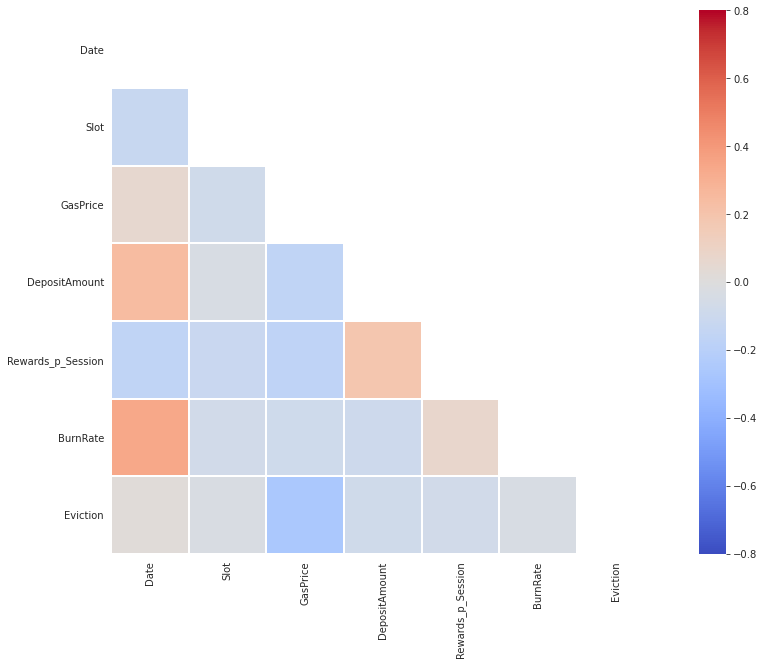

In [47]:
mask = np.zeros_like(df3.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(df3.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

    
#281 rows × 13 columns